In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [224]:
insta=pd.read_csv("insta.csv",index_col=0)
webscrape=pd.read_csv("price.csv",index_col=0)
all_data=pd.read_csv("all.csv",index_col=0)

In [49]:
##display image
from PIL import Image
import urllib.request
import io

URL =insta.image_url[100]

with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f)

img.show()

In [194]:
insta.blogger.value_counts()

weworewhat       133
alexachung       117
chiara           100
songofstyle       87
fashiondiary      78
oliviaculpo       60
gigihadid         60
helenabordon      60
oliviapalermo     60
kyliejenner       60
juliahengel       53
heileybaldwin     49
imjennim          36
Name: blogger, dtype: int64

In [206]:

df = sns.load_dataset('iris')


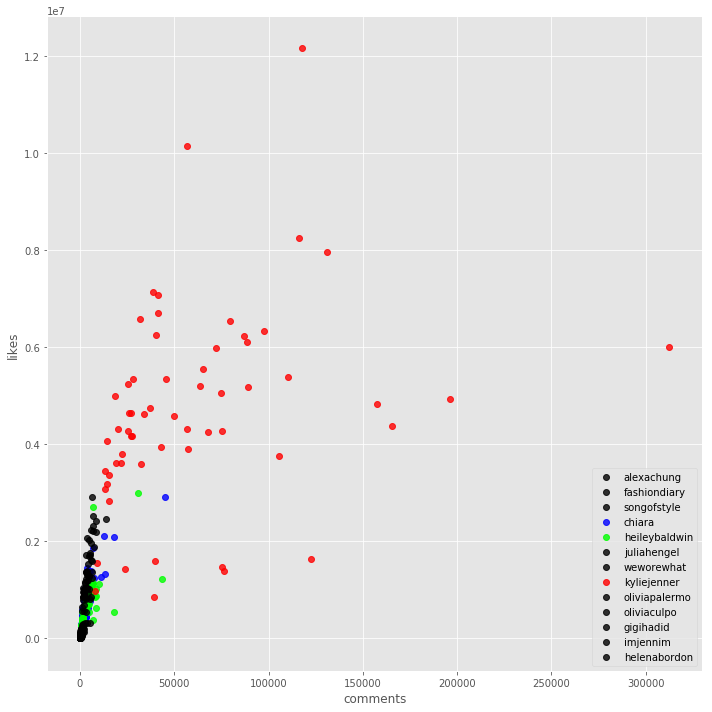

In [215]:
import seaborn as sns

#pal=dict("weworewhat"="k", "alexachung"="k","chiara"="k","songofstyle"= "k","fashiondiary"="k","oliviaculpo"="k","gigihadid"="k", "elenabordon"="k","oliviapalermo"="k","kyliejenner"="k","juliahengel"="k","heileybaldwin"="k","imjennim"="k")

sns.lmplot(x="comments", y="likes", data=insta,fit_reg=False,hue="blogger", legend=False, size=10,palette=dict(weworewhat="k", alexachung="k",chiara="b",songofstyle= "k",fashiondiary="k",oliviaculpo="k",gigihadid="k", helenabordon="k",oliviapalermo="k",kyliejenner="r",juliahengel="k",heileybaldwin="lime",imjennim="k"))
#sns.set_palette("cubehelix", 13)
plt.legend(loc='lower right')

plt.show()

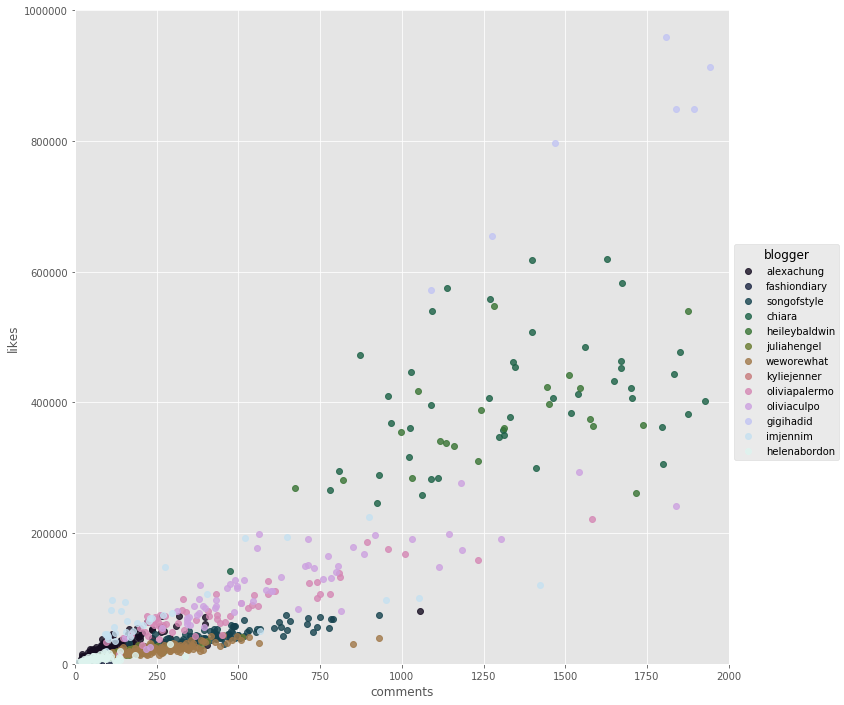

In [216]:
plot=sns.lmplot("comments", "likes", data=insta,fit_reg=False,hue="blogger", size=10)
sns.set_palette("cubehelix", 13)
plot.set(ylim=(0, 1000000))
plot.set(xlim=(0, 2000))

Text(0,0.5,'Likes')

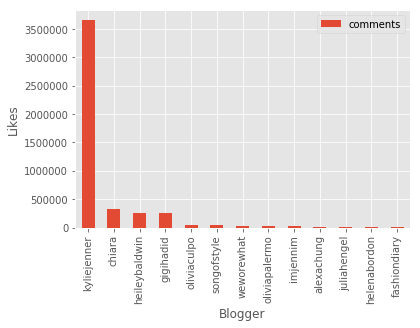

In [148]:
insta_plot=insta.groupby("blogger").agg({'comments': 'sum'}).sort_values(by="comments",ascending=False)
insta_plot.plot.bar()
plt.xlabel("Blogger")
plt.ylabel("Likes")


Text(0,0.5,'Comments')

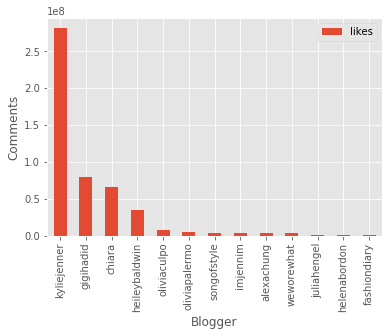

In [151]:
insta_plot_likes=insta.groupby("blogger").agg({'likes': 'sum'}).sort_values(by="likes",ascending=False)
insta_plot_likes.plot.bar()
plt.xlabel("Blogger")
plt.ylabel("Comments")


C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'blogger' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Posts')

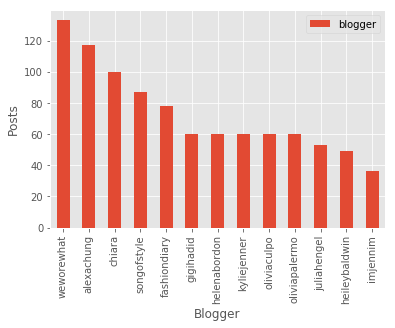

In [159]:
blogger_plot=insta.groupby("blogger").agg({"blogger":"count"}).sort_values(by="blogger",ascending=False)
blogger_plot.plot.bar()
plt.xlabel("Blogger")
plt.ylabel("Posts")


### Webscrape Price EDA

In [220]:
print(webscrape.head(n=5))
print(webscrape.shape)

  brand category   price          product_name website
0    HM      Top   $4.99        Cotton T-shirt      HM
1    HM      Top  $14.99     V-neck Jersey Top      HM
2    HM      Top   $9.99  Jersey Top with Lace      HM
3    HM      Top   $9.99            V-neck Top      HM
4    HM      Top   $2.99   Jersey Camisole Top      HM
(36928, 5)


In [237]:
webscrape.price=webscrape.price.replace('[\$,]', '', regex=True).astype(float)

In [239]:
webscrape.groupby("website").agg({"price":"median"}).sort_values(by="price",ascending=False)

,price
website,
Bloomingdales,159.00
Macy,69.50
ASOS,40.00
Fashion Nova,19.99
HM,19.99


Text(0,0.5,'Median Price')

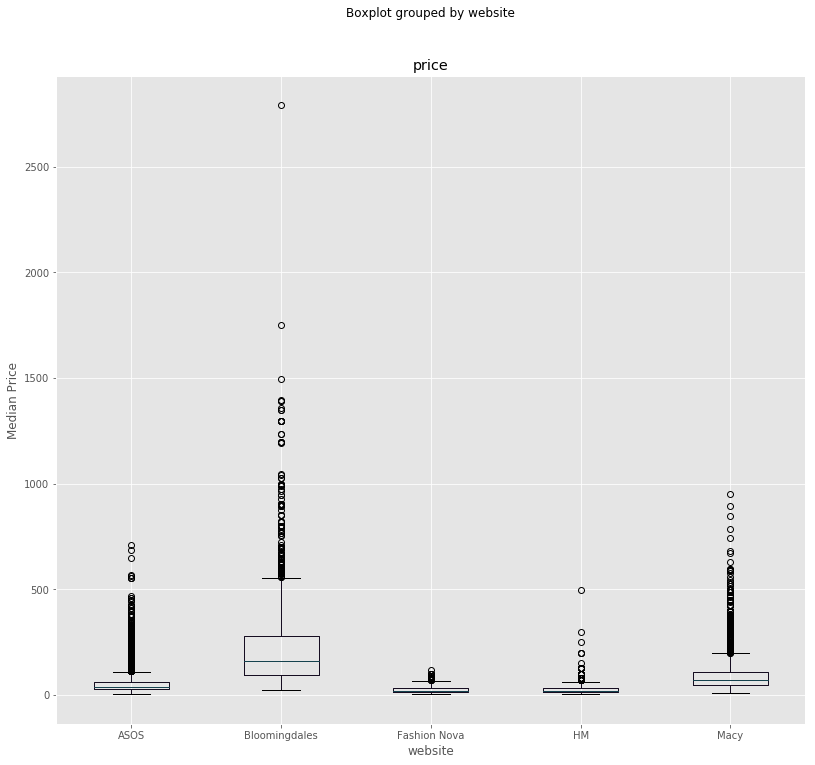

In [245]:
webscrape.boxplot(by="website", column="price",figsize=(13,12))
plt.ylabel('Median Price')